# Reconnaissance des Digits basée sur les enregistrements Audios - Synthèse

### Importer les bibliothéques necessaires 

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import joblib

from Tools.tools import collection

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

C:\Users\utilisateur\anaconda3\envs\DigitsRecognition_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Collection 

In [ ]:
#collection()

#### 1. Importer votre DataSet

In [6]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

##### Print

In [7]:
mydata.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,9.941398,-24.484889,-1.478570,-7.971703,-2.470608,-8.027298,-3.567422,-5.001823,-2.378043,2.369801,3.967911,1.400145,0.0
1,9.799164,-31.615510,-4.525482,-11.624347,-3.215132,-6.179778,-0.660283,-2.051269,-1.684845,0.215361,0.768086,-1.691669,1.0
2,10.119382,-31.544456,-3.194658,-9.001890,-0.731254,-4.902944,-1.061813,-4.255388,-5.261812,-4.463708,-3.450274,-3.169459,2.0
3,10.354260,-29.990822,-2.728523,-10.392988,-4.091374,-9.489000,-3.767187,-2.098165,0.520167,2.767215,3.634315,-0.445441,3.0
4,9.814093,-32.553753,-7.042249,-11.538412,-3.070324,-8.158254,-1.606384,-3.610648,-4.453116,-3.432150,-0.601025,0.597645,4.0


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     100 non-null    float64
 1   Fe2     100 non-null    float64
 2   Fe3     100 non-null    float64
 3   Fe4     100 non-null    float64
 4   Fe5     100 non-null    float64
 5   Fe6     100 non-null    float64
 6   Fe7     100 non-null    float64
 7   Fe8     100 non-null    float64
 8   Fe9     100 non-null    float64
 9   Fe10    100 non-null    float64
 10  Fe11    100 non-null    float64
 11  Fe12    100 non-null    float64
 12  Target  100 non-null    float64
dtypes: float64(13)
memory usage: 10.3 KB


#### 3. Visualiser les targets

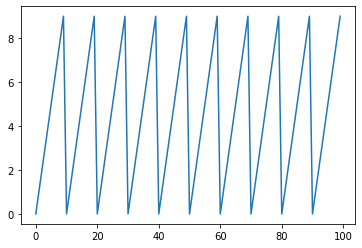

In [7]:
plt.plot(mydata[mydata.columns[-1]]);

#### 4. Notre variable target (Y) est 'Target', Récuprer X et y à partir du jeu de données 

In [8]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(100, 12)

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 20 entries, 83 to 31
Series name: Target
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


#### 6. Développer votre meilleur modèle de classification

##### 1. Mise en place des pipelines

In [10]:
pipeKNN = Pipeline([('minmax', MinMaxScaler()),
                    ('scaler', StandardScaler()),
                    ('knn', KNeighborsClassifier())])

pipeSVC = Pipeline([('minmax', MinMaxScaler()),
                    ('scaler', StandardScaler()),
                    ('svc', SVC())])

pipeDecisionTree = Pipeline([   ('minmax', MinMaxScaler()),
                                ('scaler', StandardScaler()),
                                ('decisionTree', DecisionTreeClassifier())])

pipeRandomForest = Pipeline([   ('minmax', MinMaxScaler()),
                                ('scaler', StandardScaler()),
                                 ('randomForest', RandomForestClassifier())])

pipeGradientBoosting = Pipeline([   ('minmax', MinMaxScaler()),
                                    ('scaler', StandardScaler()),
                                    ('gradientBoost', GradientBoostingClassifier())])

pipeMLP = Pipeline([('minmax', MinMaxScaler()),
                    ('scaler', StandardScaler()),
                    ('mlp', MLPClassifier())])
                 
pipeXBG = Pipeline([('minmax', MinMaxScaler()),
                    ('scaler', StandardScaler()),
                    ('xgb', XGBClassifier())])

classifierList = [pipeKNN, pipeSVC, pipeDecisionTree, pipeRandomForest, pipeGradientBoosting, pipeMLP, pipeXBG]

##### 2. Paramétrage des estimateurs

In [11]:
# KNN
knnNeighbors = range(1, 5)
knnMetrics = ["euclidean", "manhattan", "minkowski"]
knnP = range(1, 5)
paramKNN = dict(knn__n_neighbors = knnNeighbors, 
                knn__metric = knnMetrics)

# SVM
svcKernel = ["linear", "poly", "rbf", "sigmoid"]
svcDegree = range(1, 10)
svcGamma = ["scale", "auto"]
paramSVC = dict(svc__kernel = svcKernel, 
                svc__degree = svcDegree, 
                svc__gamma = svcGamma)

# Decision Tree
decisionTreeCriterion = ["gini", "entropy"]
decisionTreeSplitter = ["best", "random"]
decisionTreeMaxFeatures = ["sqrt", "log2", None]
decisionTreeRandomState = [42]
paramDecisionTree = dict(   decisionTree__criterion = decisionTreeCriterion, 
                            decisionTree__splitter = decisionTreeSplitter, 
                            decisionTree__max_features = decisionTreeMaxFeatures, 
                            decisionTree__random_state=decisionTreeRandomState)

# Random Forest
randomForestRandomState = [42]
randomForestMaxFeatures = ["sqrt", "log2", None]
paramRandomForest = dict(   randomForest__criterion = decisionTreeCriterion, 
                            randomForest__max_features=randomForestMaxFeatures, 
                            randomForest__random_state=randomForestRandomState)

# Gradient Boosting
gradientBoostingLoss = ["deviance"]
gradientBoostingCriterion = ["friedman_mse", "squared_error"]
gradientBoostingRandomState = [42]
gradientBoostingMaxfeatures = ["sqrt", "log2", None]
paramGradientBoosting = dict(   gradientBoost__criterion=gradientBoostingCriterion, 
                                gradientBoost__loss=gradientBoostingLoss, 
                                gradientBoost__max_features=gradientBoostingMaxfeatures,
                                gradientBoost__random_state=gradientBoostingRandomState)

# MLP
mlpActivation = ["identity", "logistic","tanh", "relu"]
mlpSolver = ["lbfgs", "sgd", "adam"]
mlpLearningRate = ["constant", "invscaling", "adaptive"]
mlpHiddenLayerSizes = [(1,),(2,),(3,),(4,),(5,)]
mlpRandomState = [42]
mlpMaxIter = [1000]
paramMLP = dict(mlp__activation=mlpActivation,
                mlp__solver=mlpSolver,
                mlp__learning_rate=mlpLearningRate,
                mlp__hidden_layer_sizes=mlpHiddenLayerSizes,
                mlp__max_iter=mlpMaxIter,
                mlp__random_state=mlpRandomState)
                 
# XBG
xgbBooster=["gbtree", "gblinear", "dart"]
xgbNEstimator=[10, 100]
xgbLabelEncoder=[False]
xgbEvalMetric=["mlogloss"]
paramXBG = dict(xgb__booster=xgbBooster,
                xgb__n_estimators=xgbNEstimator,
                xgb__use_label_encoder=xgbLabelEncoder,
                xgb__eval_metric=xgbEvalMetric)

paramList = [paramKNN, paramSVC, paramDecisionTree, paramRandomForest, paramGradientBoosting, paramMLP, paramXBG]

##### 3. Choix des meilleurs hyperparamètres

In [12]:
def bestParam(X, y, pipe:Pipeline, param:dict):
    grid = GridSearchCV(pipe, param_grid=param, scoring="accuracy", cv=3)
    grid_search = grid.fit(X, y)
    param_grid = grid_search.best_params_
    score_grid = grid_search.best_score_

    return param_grid, score_grid

L'estimateur ```MLP``` n'étant pas forcément bien compris, lors de l'évaluation des hyperparamètres avec la fonction ```bestParam```, l'avertissement suivant est affiché : 
```bash
ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
```

Afin d'éviter cela, l'exécution de la cellule ci-dessous permet d'ignorer tous les prochains avertissements.

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
bestParams={}

for i, param in enumerate(paramList):
    classifierName=classifierList[i].get_params()["steps"][2][0]
    classifierMethod=classifierList[i].get_params()["steps"][2][1]
    print(classifierMethod)
    param_grid, score_grid = bestParam(X_train, y_train, classifierList[i], param)
    print(param_grid)
    print(score_grid)
    bestParams[classifierMethod]=(classifierName, param_grid, score_grid)
    print("-----------------")

KNeighborsClassifier()
{'knn__metric': 'euclidean', 'knn__n_neighbors': 1}
0.8380816714150048
-----------------
SVC()
{'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
0.8879392212725546
-----------------
DecisionTreeClassifier()
{'decisionTree__criterion': 'gini', 'decisionTree__max_features': None, 'decisionTree__random_state': 42, 'decisionTree__splitter': 'best'}
0.6253561253561254
-----------------
RandomForestClassifier()
{'randomForest__criterion': 'gini', 'randomForest__max_features': 'sqrt', 'randomForest__random_state': 42}
0.8266856600189935
-----------------
GradientBoostingClassifier()
{'gradientBoost__criterion': 'friedman_mse', 'gradientBoost__loss': 'deviance', 'gradientBoost__max_features': 'sqrt', 'gradientBoost__random_state': 42}
0.7630579297245964
-----------------
MLPClassifier()
{'mlp__activation': 'identity', 'mlp__hidden_layer_sizes': (3,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 1000, 'mlp__random_state': 42, 'mlp__solver': 'adam'}


In [20]:
bestParams

{KNeighborsClassifier(): ('knn',
  {'knn__metric': 'euclidean', 'knn__n_neighbors': 1},
  0.8380816714150048),
 SVC(): ('svc',
  {'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'},
  0.8879392212725546),
 DecisionTreeClassifier(): ('decisionTree',
  {'decisionTree__criterion': 'gini',
   'decisionTree__max_features': None,
   'decisionTree__random_state': 42,
   'decisionTree__splitter': 'best'},
  0.6253561253561254),
 RandomForestClassifier(): ('randomForest',
  {'randomForest__criterion': 'gini',
   'randomForest__max_features': 'sqrt',
   'randomForest__random_state': 42},
  0.8266856600189935),
 GradientBoostingClassifier(): ('gradientBoost',
  {'gradientBoost__criterion': 'friedman_mse',
   'gradientBoost__loss': 'deviance',
   'gradientBoost__max_features': 'sqrt',
   'gradientBoost__random_state': 42},
  0.7630579297245964),
 MLPClassifier(): ('mlp',
  {'mlp__activation': 'identity',
   'mlp__hidden_layer_sizes': (3,),
   'mlp__learning_rate': 'constant',
   'ml

In [24]:
max(bestParams, key=lambda x:bestParams[x][2])

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=-1, importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=4, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=None, subsample=None,
              tree_method='auto', use_label_encoder=False,
              validate_parameters=1, ...)

##### 4. Sélection du meilleur modèle

In [28]:
bestModel=max(bestParams, key=lambda x:bestParams[x][2])
bestModelName = bestParams[bestModel][0]
bestParamPipe = bestParams[bestModel][1]
bestScore = bestParams[bestModel][2]
print(bestModel)
print(bestModelName)
print(bestParamPipe)
bestPipe = Pipeline([   ('minmax', MinMaxScaler()),
                        ("scaler", StandardScaler()), 
                        (bestModelName, bestModel)])
bestPipe = bestPipe.set_params(**bestParamPipe)
bestPipe = bestPipe.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=-1, importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=4, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=None, subsample=None,
              tree_method='auto', use_label_encoder=False,
              validate_parameters=1, ...)
xgb
{'xgb__booster': 'gblinear', 'xgb__eval_metric': 'mlogloss', 'xgb__n_estimators': 10, 'xgb__tree_method': 'auto', 'xgb__use_label_encoder': False}
[23:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc

##### 5. Vérification du modèle

0.9


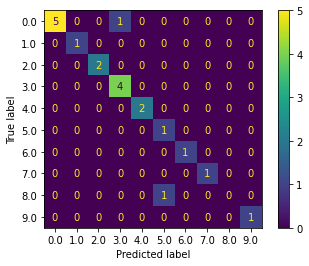

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91         6
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2
         3.0       0.80      1.00      0.89         4
         4.0       1.00      1.00      1.00         2
         5.0       0.50      1.00      0.67         1
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         1
         8.0       0.00      0.00      0.00         1
         9.0       1.00      1.00      1.00         1

    accuracy                           0.90        20
   macro avg       0.83      0.88      0.85        20
weighted avg       0.89      0.90      0.88        20



In [25]:
y_pred = bestPipe.predict(X_test)

predScore = accuracy_score(y_test, y_pred)
print(predScore)

predConfusionMatrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

predRapport = classification_report(y_test, y_pred)
print(predRapport)

##### 4. Enregistrement du meilleur estimateur

In [31]:
now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M")
methodName = str(bestModel).split('(')[0]
filename = f"Digits_Recognition_Project/Models/.back/{dt_string}_{methodName}_{bestScore:.2f}.pkl"
joblib.dump(bestPipe, filename)

['Digits_Recognition_Project/Models/.back/20220320_2330_XGBClassifier_0.91.pkl']

# Application en Temps Réel

Après avoir créé le modèle avec la cellule ci-dessus, déplacez le modèle dans le dossier ```Digits_Recognition_Project/Models/``` et modifiez le chemin du modèle à charger ci-dessous en conséquence :

In [34]:
from Tools.tools import rec
model = joblib.load('Digits_Recognition_Project/Models/20220320_2330_XGBClassifier_0.91.pkl')

In [40]:
rec(model)

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer votre Digit : 


------------------
Digit :  [0]
------------------
